**Importing Dependencies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import metrics

**Data Collection**

In [190]:
# Loading the dataset into a pandas dataframe
crop_df = pd.read_csv("yield_df.csv")

In [191]:
# Getting the first five rows of the dataset
crop_df.head()

Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37

In [192]:
# Getting the data for only Australia
print(crop_df[crop_df["Area"] == "Australia"])

      Unnamed: 0       Area   Item  Year  hg/ha_yield  \
808          808  Australia  Maize  1990        41821   
809          809  Australia  Maize  1990        41821   
810          810  Australia  Maize  1990        41821   
811          811  Australia  Maize  1990        41821   
812          812  Australia  Maize  1990        41821   
...          ...        ...    ...   ...          ...   
1769        1769  Australia  Wheat  2013        17609   
1770        1770  Australia  Wheat  2013        17609   
1771        1771  Australia  Wheat  2013        17609   
1772        1772  Australia  Wheat  2013        17609   
1773        1773  Australia  Wheat  2013        17609   

      average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
808                           534.0           17866.00     16.80  
809                           534.0           17866.00     20.06  
810                           534.0           17866.00     12.11  
811                           534.0           1

In [193]:
# Dropping unnecessary columns
crop_df.drop(columns="Unnamed: 0", axis=1, inplace=True)

In [194]:
# Printing updated dataset
crop_df.head()

Area         Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0  Albania        Maize  1990        36613                         1485.0   
1  Albania     Potatoes  1990        66667                         1485.0   
2  Albania  Rice, paddy  1990        23333                         1485.0   
3  Albania      Sorghum  1990        12500                         1485.0   
4  Albania     Soybeans  1990         7000                         1485.0   

   pesticides_tonnes  avg_temp  
0              121.0     16.37  
1              121.0     16.37  
2              121.0     16.37  
3              121.0     16.37  
4              121.0     16.37

In [195]:
# Getting the dimnesion of the dataset
crop_df.shape

(28242, 7)

In [196]:
# Getting some info about the dataset
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [197]:
# Checking for null values
crop_df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [198]:
# Checking for duplicate rows
crop_df.duplicated().sum()

2310

In [199]:
# Dropping all duplicate values
crop_df.drop_duplicates(inplace=True)

In [200]:
# Checking the dimension of the updated dataset
crop_df.shape

(25932, 7)

In [201]:
# Statistical measures of the data
crop_df.describe()

Year    hg/ha_yield  average_rain_fall_mm_per_year  \
count  25932.000000   25932.000000                   25932.000000   
mean    2001.556455   76978.132925                    1146.836688   
std        7.055924   84647.605552                     717.391098   
min     1990.000000      50.000000                      51.000000   
25%     1995.000000   19996.000000                     593.000000   
50%     2001.000000   39530.000000                    1083.000000   
75%     2008.000000  104168.000000                    1668.000000   
max     2013.000000  501412.000000                    3240.000000   

       pesticides_tonnes      avg_temp  
count       25932.000000  25932.000000  
mean        34782.573241     20.422251  
std         57228.568244      6.439402  
min             0.040000      1.300000  
25%          1597.000000     16.580000  
50%         15373.000000     21.420000  
75%         45620.000000     26.060000  
max        367778.000000     30.650000

In [202]:
crop_df["average_rain_fall_mm_per_year"].dtype

dtype('float64')

**Data Visualization**

**Question 1: What is the Area distribution?**

<Axes: xlabel='count', ylabel='Area'>

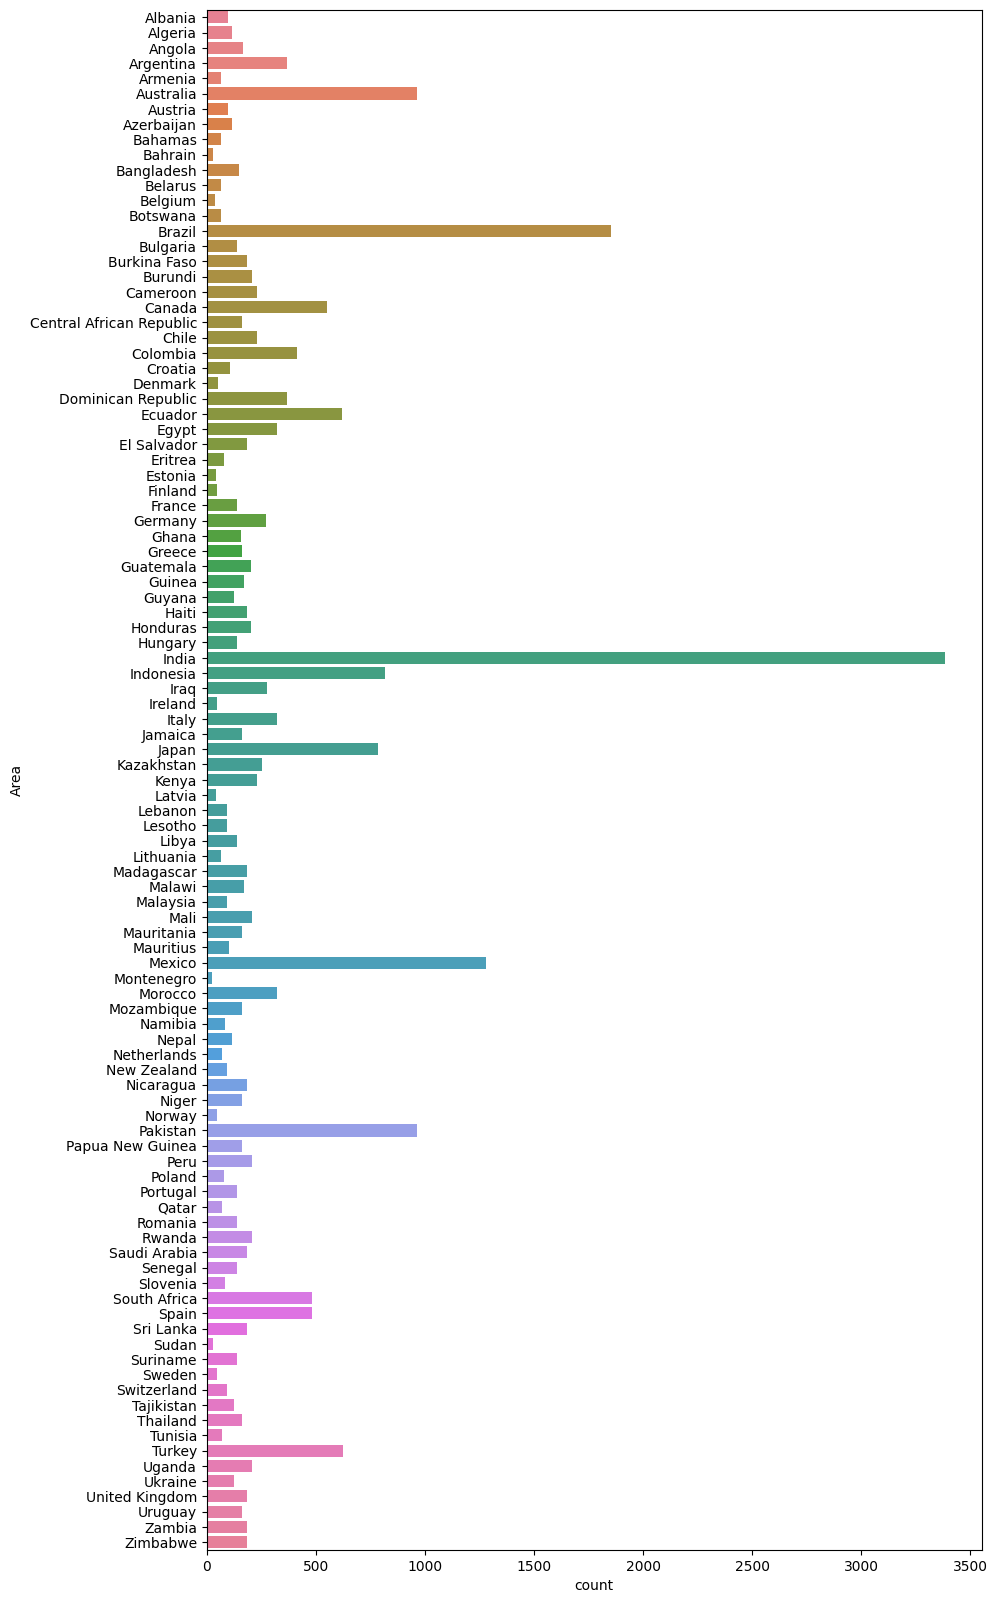

In [203]:
# Constructing a count plot
plt.figure(figsize=(10, 20))
sns.countplot(y=crop_df["Area"], hue=crop_df["Area"])

**Question 2: What are the sum yield per country?**

In [204]:
# Getting the countries without duplications
countries = crop_df["Area"].unique().tolist()
countries

['Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chile',
 'Colombia',
 'Croatia',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eritrea',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'India',
 'Indonesia',
 'Iraq',
 'Ireland',
 'Italy',
 'Jamaica',
 'Japan',
 'Kazakhstan',
 'Kenya',
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Libya',
 'Lithuania',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Mali',
 'Mauritania',
 'Mauritius',
 'Mexico',
 'Montenegro',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Niger',
 'Norway',
 'Pakistan',
 'Papua New Guinea',
 'Peru',
 'Poland',
 'Portugal',
 'Qatar',


In [205]:
# Gettting the sum of yield for each country
yield_per_country = []
for country in countries:
    yield_per_country.append(crop_df[crop_df["Area"] == country]["hg/ha_yield"].sum())
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

<Axes: >

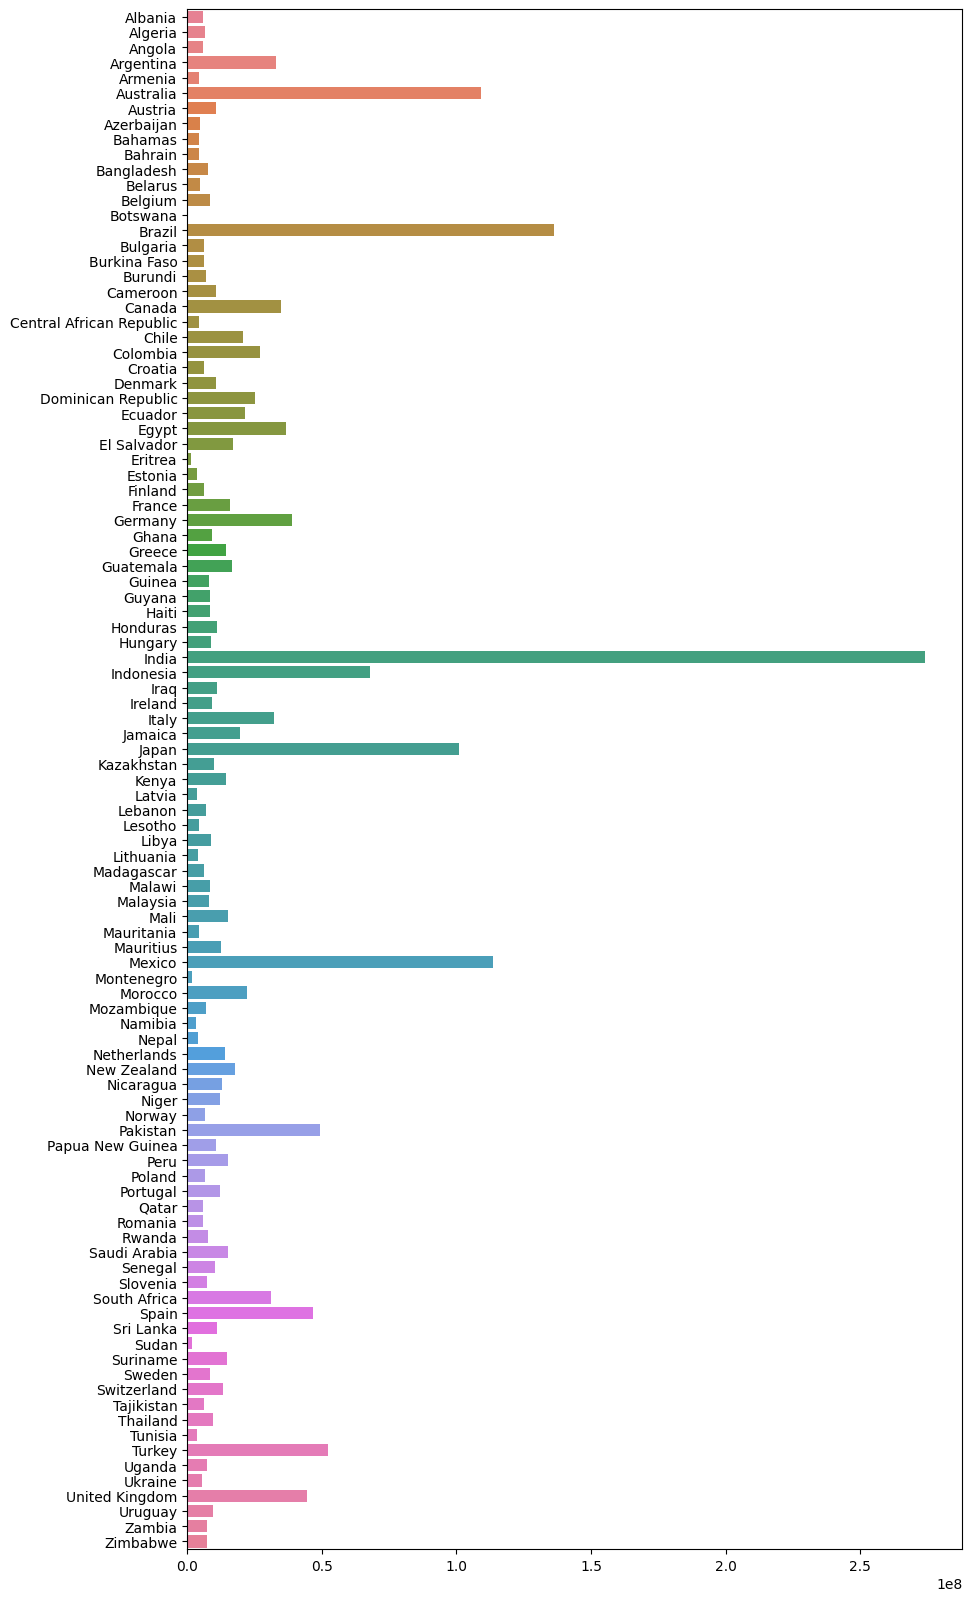

In [206]:
# Constructing a bar chart
plt.figure(figsize=(10, 20))
sns.barplot(y=countries, x=yield_per_country, hue=countries)

**Question 3: Which crop is the most cultivated?**

In [207]:
# Getting the crops planted 
crops = crop_df["Item"].value_counts().reset_index()
crops.columns = ["CROPS", "AMOUNT"]
crops

CROPS  AMOUNT
0              Potatoes    3956
1                 Maize    3824
2                 Wheat    3539
3           Rice, paddy    3091
4              Soybeans    2940
5               Sorghum    2770
6        Sweet potatoes    2593
7               Cassava    1889
8                  Yams     774
9  Plantains and others     556

In [208]:
# Plotting a pie chart illustrating the amount of crops cultivated 
px.pie(crops, names="CROPS", values="AMOUNT", color="CROPS", title="Amount of crops cultivated")

In [209]:
px.bar(crops, x="AMOUNT", y="CROPS", title="Horizontal chart showing the amount of crops cultivated", color="CROPS")

In [210]:
crop_df["Year"].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013], dtype=int64)

**Question 4: What is the total yield per crop?**

In [211]:
# Putting the crops in a list
crop_list = crop_df["Item"].unique().tolist()
crop_list

['Maize',
 'Potatoes',
 'Rice, paddy',
 'Sorghum',
 'Soybeans',
 'Wheat',
 'Cassava',
 'Sweet potatoes',
 'Plantains and others',
 'Yams']

In [212]:
# Appending the total yield per crop
yield_per_crop = []
for crop in crop_list:
    yield_per_crop.append(crop_df[crop_df["Item"] == crop]["hg/ha_yield"].sum())
yield_per_crop

[142020761,
 785921609,
 127646024,
 52906376,
 49957039,
 106614786,
 275132269,
 310269345,
 58958974,
 86769760]

In [213]:
# Plotting the bar chart
px.bar(crop_df, x=crop_list, y=yield_per_crop, color=crop_list, title="Total yield per crop")

**Feature Scaling: Converting Categorical variables to Numerical and Scaling the values**

In [214]:
# Importing dependencies 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [215]:
# Separating the data into features and target
X = crop_df.drop(columns="hg/ha_yield", axis=1) # Features
Y = crop_df["hg/ha_yield"] # Target  

In [216]:
X

Area            Item  Year  average_rain_fall_mm_per_year  \
0       Albania           Maize  1990                         1485.0   
1       Albania        Potatoes  1990                         1485.0   
2       Albania     Rice, paddy  1990                         1485.0   
3       Albania         Sorghum  1990                         1485.0   
4       Albania        Soybeans  1990                         1485.0   
...         ...             ...   ...                            ...   
28237  Zimbabwe     Rice, paddy  2013                          657.0   
28238  Zimbabwe         Sorghum  2013                          657.0   
28239  Zimbabwe        Soybeans  2013                          657.0   
28240  Zimbabwe  Sweet potatoes  2013                          657.0   
28241  Zimbabwe           Wheat  2013                          657.0   

       pesticides_tonnes  avg_temp  
0                 121.00     16.37  
1                 121.00     16.37  
2                 121.00     16.37  
3                 121.00     16.37  
4                 121.00     16.37  
...                  ...       ...  
28237            2550.07     19.76  
28238            2550.07     19.76  
28239            2550.07     19.76  
28240            2550.07     19.76  
28241            2550.07     19.76  

[25932 rows x 6 columns]

In [217]:
X.columns

Index(['Area', 'Item', 'Year', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [218]:
# Splitting the data into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [219]:
X_train.head(1)

Area     Item  Year  average_rain_fall_mm_per_year  \
19647  Mexico  Sorghum  2000                          758.0   

       pesticides_tonnes  avg_temp  
19647           34468.93     16.11

In [220]:
print(X.shape, X_train.shape, X_test.shape)

(25932, 6) (20745, 6) (5187, 6)


In [ ]:
# Identifying all categorical columns
categorical_col = X.select_dtypes(include=["object"]).columns
# categorical_col

# Identifying all numerical columns
numeric_col = X.select_dtypes(include=["number"]).columns
# numeric_col

scaler = StandardScaler()
encoder = OneHotEncoder(drop="first", sparse_output=False)

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("StandardScaler", scaler, numeric_col),
        ("OneHotEncoder", encoder, categorical_col)
    ],
    remainder="passthrough"
)

In [222]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('StandardScaler', StandardScaler(),
                                 Index(['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp'],
      dtype='object')),
                                ('OneHotEncoder',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 Index(['Area', 'Item'], dtype='object'))])

In [223]:
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.fit_transform(X_test)

In [224]:
len(Y)

25932

**Model Training**

In [225]:
# Importing models 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Training the models
models = [LinearRegression(), Lasso(), Ridge(), KNeighborsRegressor(), DecisionTreeRegressor()]

In [228]:
for model in models:
    model.fit(X_train_dummy, Y_train)
    Y_pred = model.predict(X_test_dummy)
    
    # Applying metrics
    print(f"{model}\nMean Absolute Error: {metrics.mean_absolute_error(Y_test, Y_pred)}\nR^2 score: {(metrics.r2_score(Y_test, Y_pred))}\n")

LinearRegression()
Mean Absolute Error: 29115.990543025615
R^2 score: 0.7442580503605574



c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.078e+11, tolerance: 1.498e+10



Lasso()
Mean Absolute Error: 29104.049159496597
R^2 score: 0.7442586992234488

Ridge()
Mean Absolute Error: 29069.444144068184
R^2 score: 0.744309411649773

KNeighborsRegressor()
Mean Absolute Error: 4593.005089647195
R^2 score: 0.9829759679142462

DecisionTreeRegressor()
Mean Absolute Error: 8820.210911895123
R^2 score: 0.9240157717751599



**Model Selection**

In [232]:
# Using KNN since it is the model with the best performance among other models
knn = KNeighborsRegressor(n_neighbors=1)

# Training the model
knn.fit(X_train_dummy, Y_train)

# Making predictions on the test data
knn.predict(X_test_dummy)

array([64441., 17791., 35878., ..., 27522., 73664., 10415.])

**Making a Predictive System**

In [233]:
# Define input data
input_data = ("Albania","Maize",1990,1485.0,121.0,16.37)

# Converting to a pandas dataframe
input_df = pd.DataFrame([input_data], columns=X.columns)

# Applying the preprocessor
processed_input = preprocessor.transform(input_df)

# Converting to numpy array
np_input_data = np.asarray(processed_input)

# Reshaping the input data (to a 2D array) as an instance
reshape_input_data = np_input_data.reshape(1, -1)

# Making predictions
pred = knn.predict(reshape_input_data)
print(pred[0])

36613.0
